In [12]:
# Data and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn.datasets import load_digits

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Model and metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Load the built-in digits dataset (8x8 pixel images flattened into 64 features)
digits = load_digits()
X = digits.data         # shape: (1797, 64)
y = digits.target       # Digit labels: 0–9

# Check data shape
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (1797, 64)
Target vector shape: (1797,)


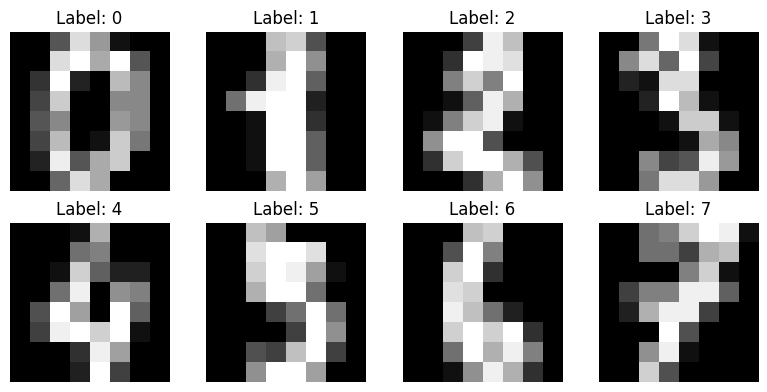

In [14]:
# Plot some example images
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')  # Use 2D images
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [15]:
# Standardization is essential before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# PCA to reduce dimensionality while preserving 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check new shape after dimensionality reduction
print("Original shape:", X_scaled.shape)
print("Reduced shape :", X_pca.shape)


Original shape: (1797, 64)
Reduced shape : (1797, 40)


In [21]:
# Create summary table
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

summary_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_var))],
    "Explained Variance Ratio": explained_var,
    "Cumulative Variance": cum_var
})

print(summary_df)


   Principal Component  Explained Variance Ratio  Cumulative Variance
0                  PC1                  0.120339             0.120339
1                  PC2                  0.095611             0.215950
2                  PC3                  0.084444             0.300394
3                  PC4                  0.064984             0.365378
4                  PC5                  0.048602             0.413979
5                  PC6                  0.042141             0.456121
6                  PC7                  0.039421             0.495542
7                  PC8                  0.033894             0.529435
8                  PC9                  0.029982             0.559418
9                 PC10                  0.029320             0.588738
10                PC11                  0.027818             0.616556
11                PC12                  0.025771             0.642326
12                PC13                  0.022753             0.665079
13                PC

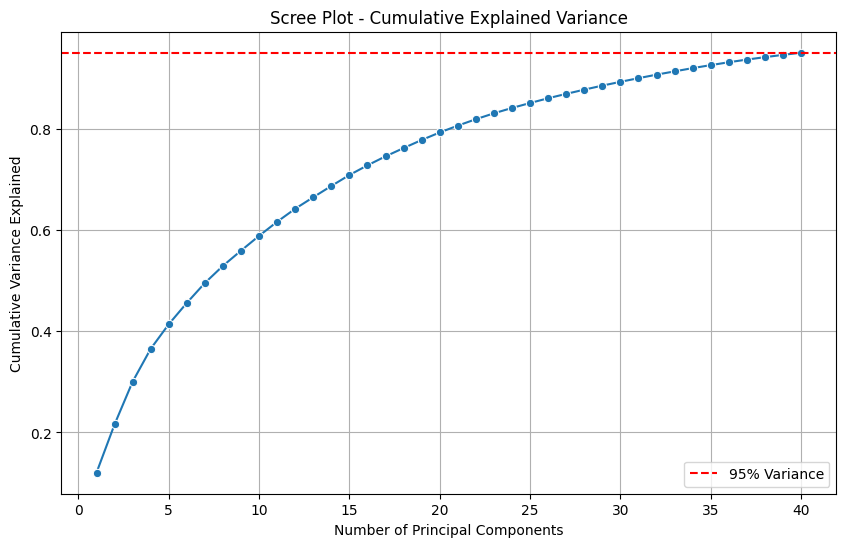

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1, len(explained_var)+1), y=cum_var, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label="95% Variance")
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Split reduced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [18]:
# Initialize and train the SVM classifier on PCA-transformed data
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm_model.predict(X_test)


Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.97      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



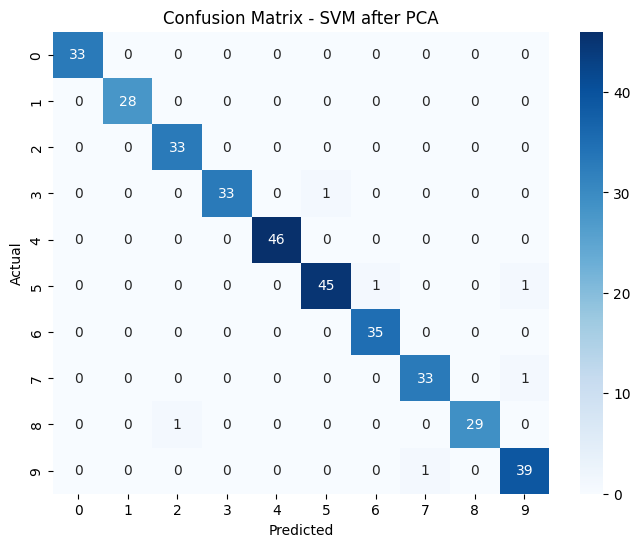

In [19]:
# Accuracy score on the test set
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - SVM after PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


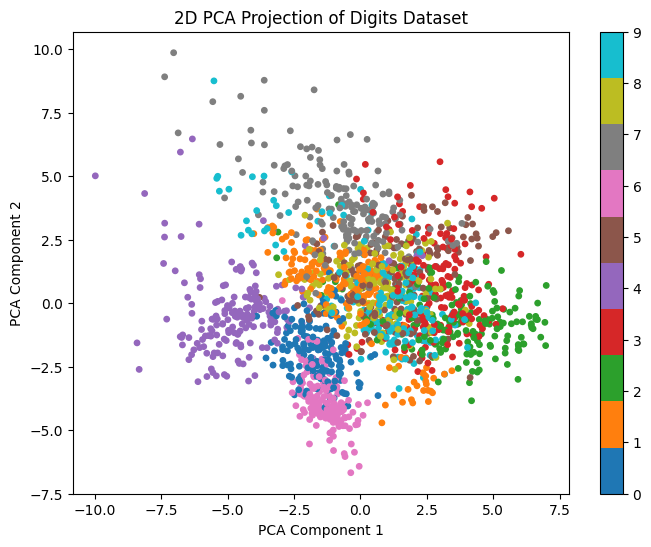

In [20]:
# Optional: Project data to 2D space using PCA for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Scatter plot showing digits in 2D PCA space
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar()
plt.title("2D PCA Projection of Digits Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
